In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier


In [22]:
path = r'C:\Users\alger\Documents\000. Projects\002. CAM DS\Course 2\6.3.1 Predict Dropout Rate\dropout data\data.xlsx'

df = pd.read_excel(path)

# transform problem into binary classification by dropping enrolled as a class
df = df[df['Target'] != 'Enrolled']
df['Dropout'] = (df['Target'] == 'Dropout').astype(int)
df = df.drop(columns=['Target'])

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [23]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Display the NaN counts for each column
print("\nNumber of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder        

In [24]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.391460
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\alger\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\alger\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


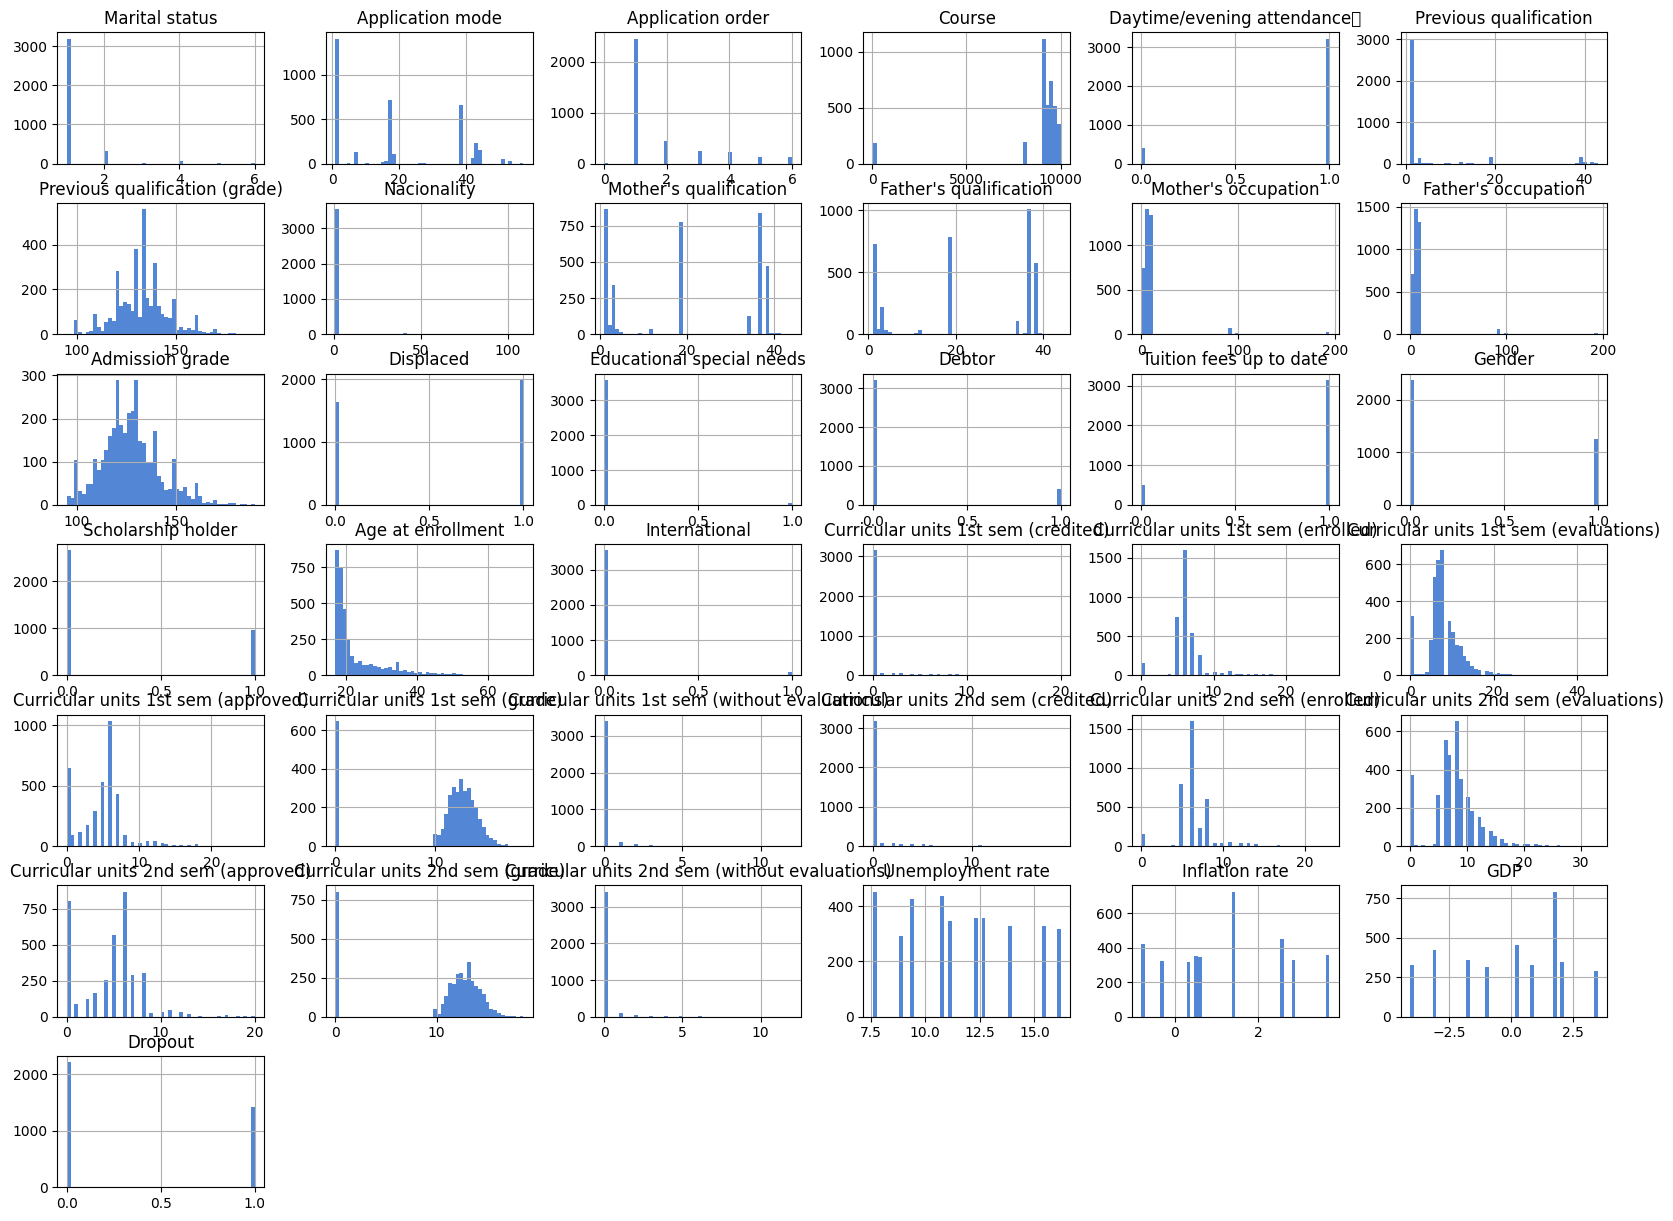

In [25]:
df[df.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

c:\Users\alger\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\alger\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\alger\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


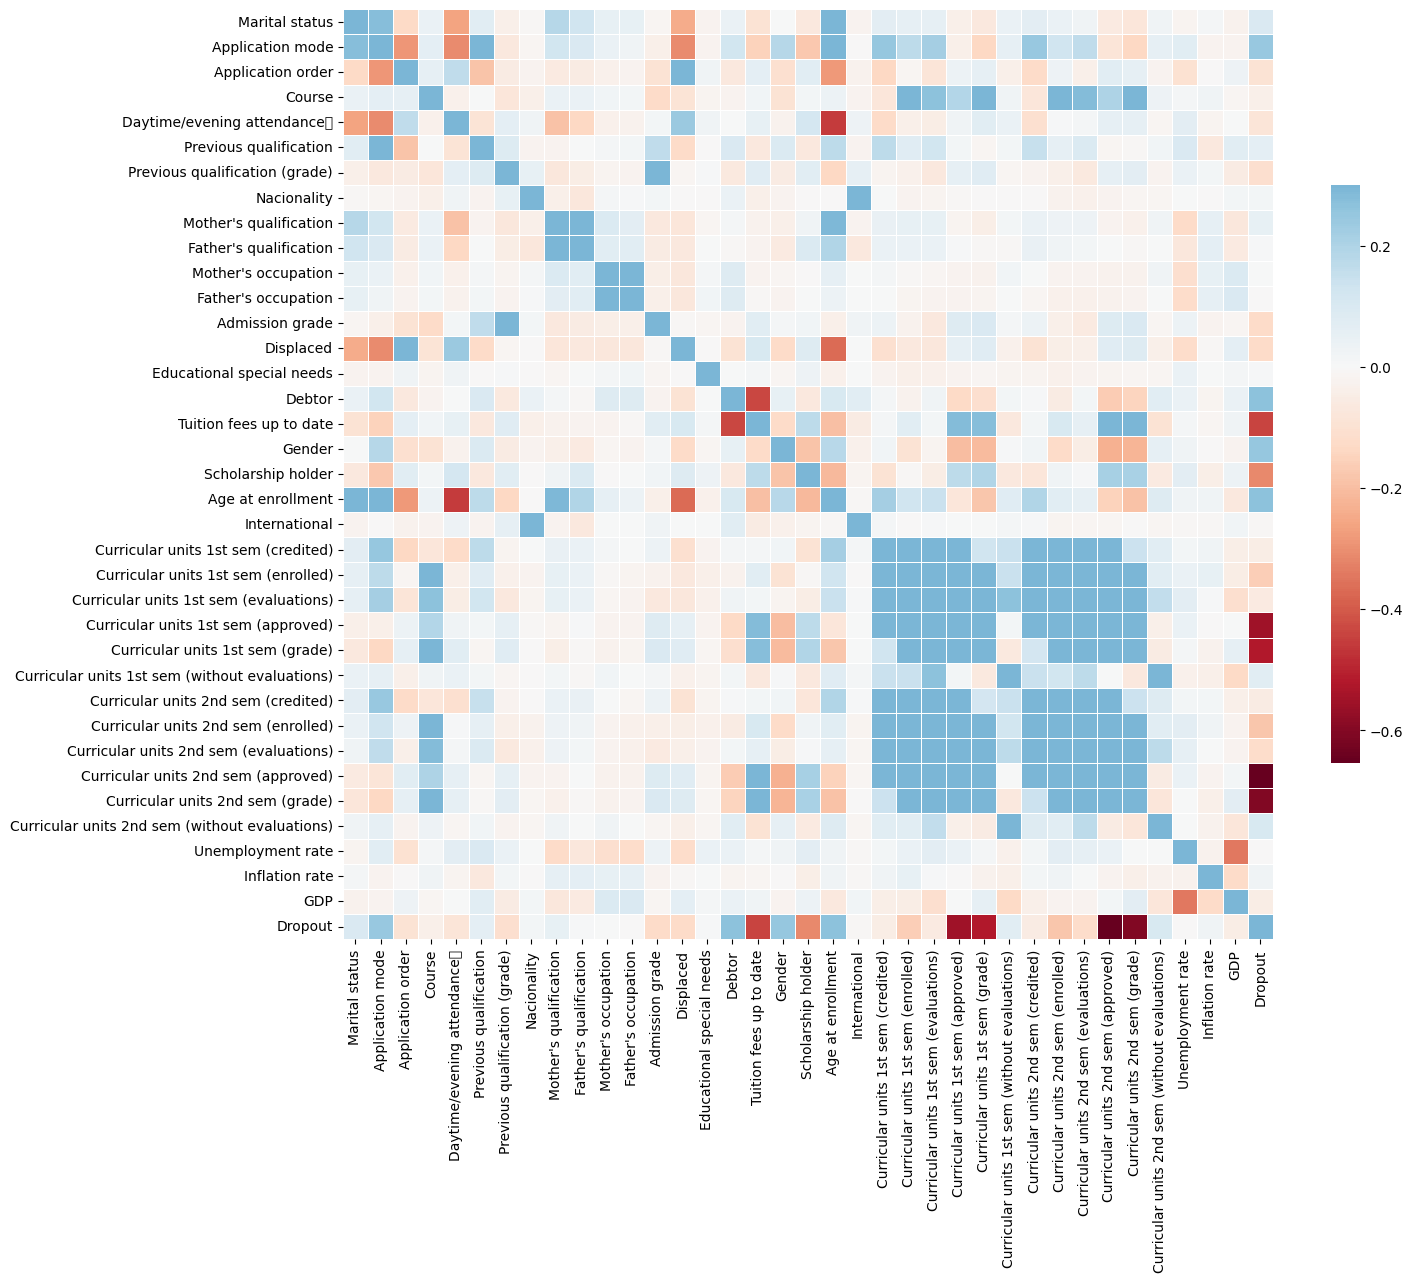

In [26]:
f = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=False, cmap='RdBu',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show

In [31]:
correlation_matrix = df.corr()

# Filter columns with correlation above 0.2 or below -0.2 with Dropout
correlated_columns = correlation_matrix['Dropout'][(correlation_matrix['Dropout'] > 0.2) | (correlation_matrix['Dropout'] < -0.2)].index.tolist()
correlated_columns.remove('Dropout')

print(correlated_columns)

['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


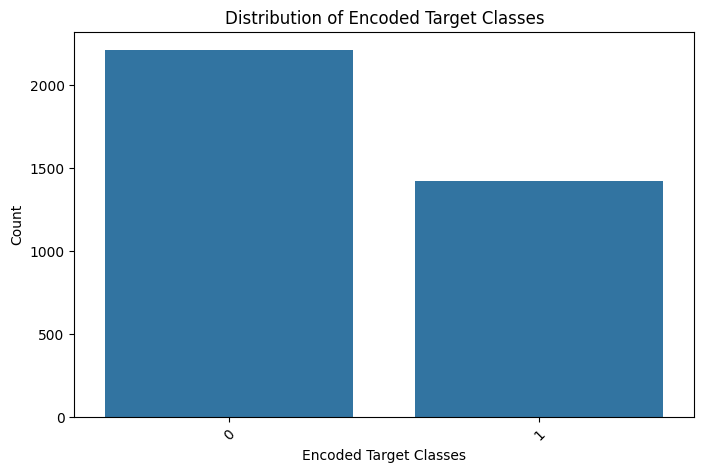

In [28]:
# Count the number of occurrences for each class in 'Target'
class_counts = df['Dropout'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)

# Labeling
plt.xlabel("Encoded Target Classes")
plt.ylabel("Count")
plt.title("Distribution of Encoded Target Classes")
plt.xticks(rotation=45)  # Rotate labels if there are many classes
plt.show()

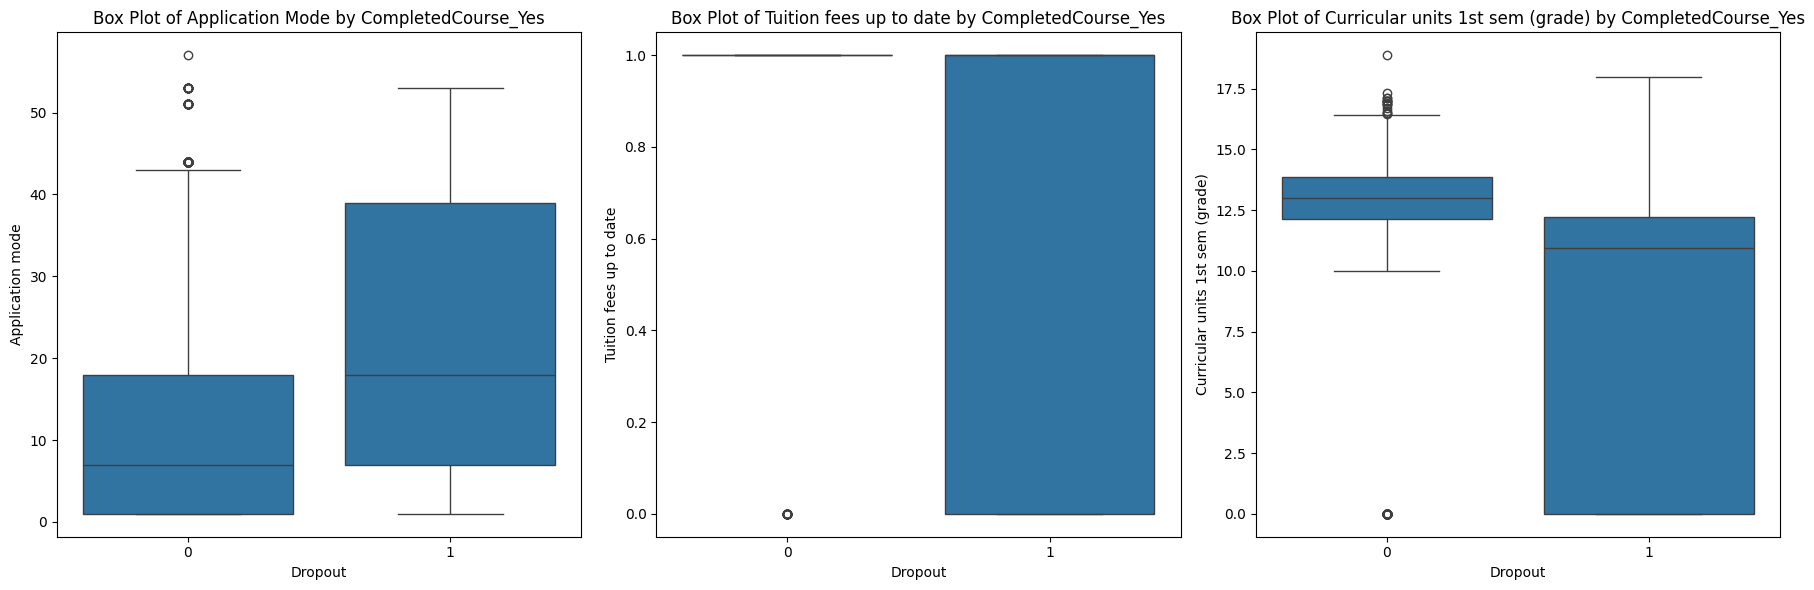

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Box plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(x='Dropout', y='Application mode', data=df)
plt.title('Box Plot of Application Mode by CompletedCourse_Yes')
plt.xlabel('Dropout')
plt.ylabel('Application mode')

# Box plot for CreditWeightedAverage
plt.subplot(1, 3, 2)
sns.boxplot(x='Dropout', y='Tuition fees up to date', data=df)
plt.title('Box Plot of Tuition fees up to date by CompletedCourse_Yes')
plt.xlabel('Dropout')
plt.ylabel('Tuition fees up to date')

# Box plot for UnauthorisedAbsenceCount
plt.subplot(1, 3, 3)
sns.boxplot(x='Dropout', y='Curricular units 1st sem (grade)', data=df)
plt.title('Box Plot of Curricular units 1st sem (grade) by CompletedCourse_Yes')
plt.xlabel('Dropout')
plt.ylabel('Curricular units 1st sem (grade)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [35]:
df_analysis = df[['Dropout'] + correlated_columns]

df_analysis = pd.get_dummies(df_analysis, columns=['Application mode'], prefix='AppMode', drop_first=True, dtype=int)

df_analysis

,Dropout,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),...,AppMode_18,AppMode_26,AppMode_27,AppMode_39,AppMode_42,AppMode_43,AppMode_44,AppMode_51,AppMode_53,AppMode_57
0,1,0,1,1,0,20,0,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,19,6,14.000000,6,13.666667,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,19,0,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,20,6,13.428571,5,12.400000,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,45,5,12.333333,6,13.000000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,1,1,0,19,5,13.600000,5,12.666667,...,0,0,0,0,0,0,0,0,0,0
4420,1,1,0,0,0,18,6,12.000000,2,11.000000,...,0,0,0,0,0,0,0,0,0,0
4421,1,0,1,0,1,30,7,14.912500,1,13.500000,...,0,0,0,0,0,0,0,0,0,0
4422,0,0,1,0,1,20,5,13.800000,5,12.000000,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# define target and features
X = df_analysis.drop(columns=['Dropout'])
y = df_analysis['Dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the sizes of the splits
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 2904
Test set size: 726


#### Logistic Regression

logistic model accuracy:  0.8815426997245179


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       449
           1       0.89      0.79      0.84       277

    accuracy                           0.88       726
   macro avg       0.88      0.86      0.87       726
weighted avg       0.88      0.88      0.88       726



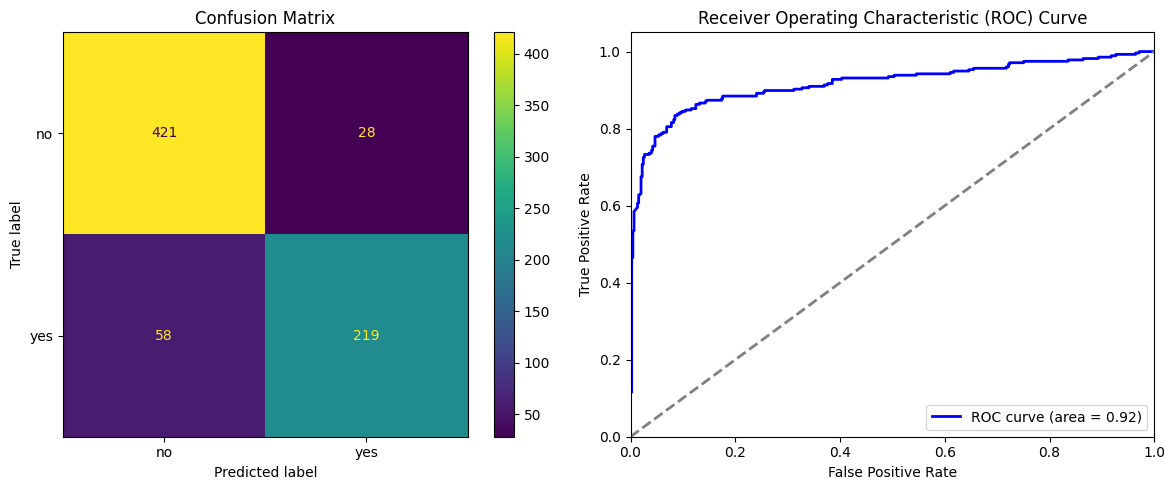

AUC: 0.9168268032450774


In [45]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print("logistic model accuracy: ", accuracy_score(y_test, predictions))
print()
print()
print(classification_report(y_test, predictions))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])

# Predicting probabilities
y_prob = logmodel.predict_proba(X_test)[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotting Confusion Matrix and ROC Curve side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix
cfmd.plot(ax=ax[0])
ax[0].set_title('Confusion Matrix')

# Plot ROC curve
ax[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
ax[1].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

print(f"AUC: {auc}")

#### Random Forest

random forest model accuracy:  0.8856749311294766


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       449
           1       0.89      0.80      0.84       277

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



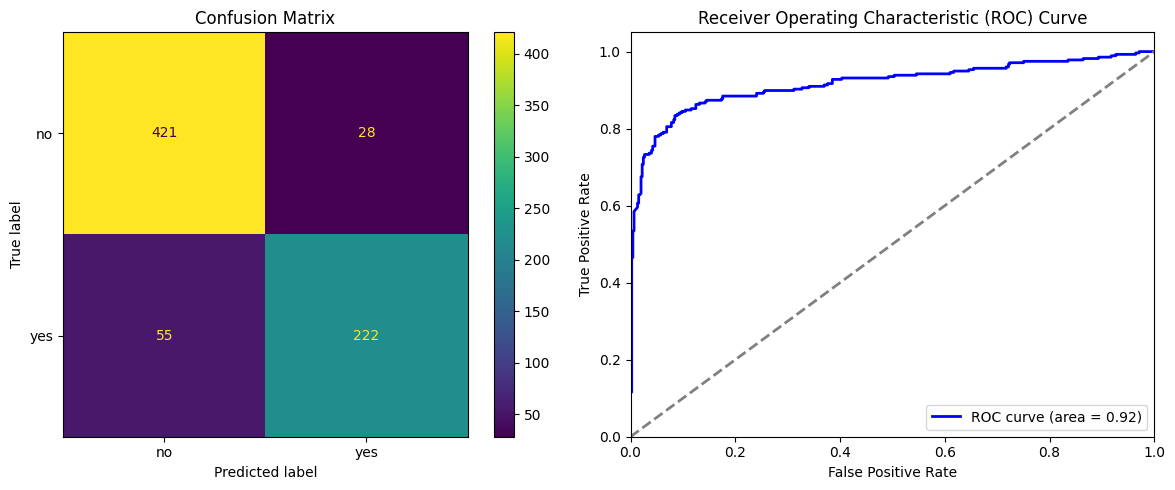

AUC: 0.9168268032450774


In [59]:
rfmodel = RandomForestClassifier(n_estimators=200)
rfmodel.fit(X_train,y_train)
predictions = rfmodel.predict(X_test)

print("random forest model accuracy: ", accuracy_score(y_test, predictions))
print()
print()
print(classification_report(y_test, predictions))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])

# Predicting probabilities
y_prob = logmodel.predict_proba(X_test)[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotting Confusion Matrix and ROC Curve side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix
cfmd.plot(ax=ax[0])
ax[0].set_title('Confusion Matrix')

# Plot ROC curve
ax[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
ax[1].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

print(f"AUC: {auc}")

#### XGBoost

In [49]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [1, 2, 3, 4],
    'n_estimators': [25, 50, 100, 200],
}

# Define the custom scorer for the F1 score of the target variable = 0
f1_score_0 = make_scorer(f1_score, pos_label=0)

In [50]:
def train_and_evaluate_xgboost(X_train, X_test, y_train, y_test, param_grid):
    # Define the custom scorer for the F1 score of the target variable = 0
    f1_score_0 = make_scorer(f1_score, pos_label=0)

    # Initialize the XGBoost model
    xg_model = xgb.XGBClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring=f1_score_0, n_jobs=-1, verbose=2)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Model evaluation
    predictions = best_model.predict(X_test)
    print("XGBoost Model Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])

    # Predicting probabilities
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculating ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    # Plotting Confusion Matrix and ROC Curve side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot confusion matrix
    cfmd.plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    # Plot ROC curve
    ax[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
    ax[1].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    ax[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    print(f"AUC: {auc}")

    # Plot feature importance
    plot_importance(best_model, importance_type='gain')
    plt.title('Feature Importance (Gain)')
    plt.show()

    print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
XGBoost Model Accuracy:  0.8870523415977961
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       449
           1       0.88      0.82      0.85       277

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



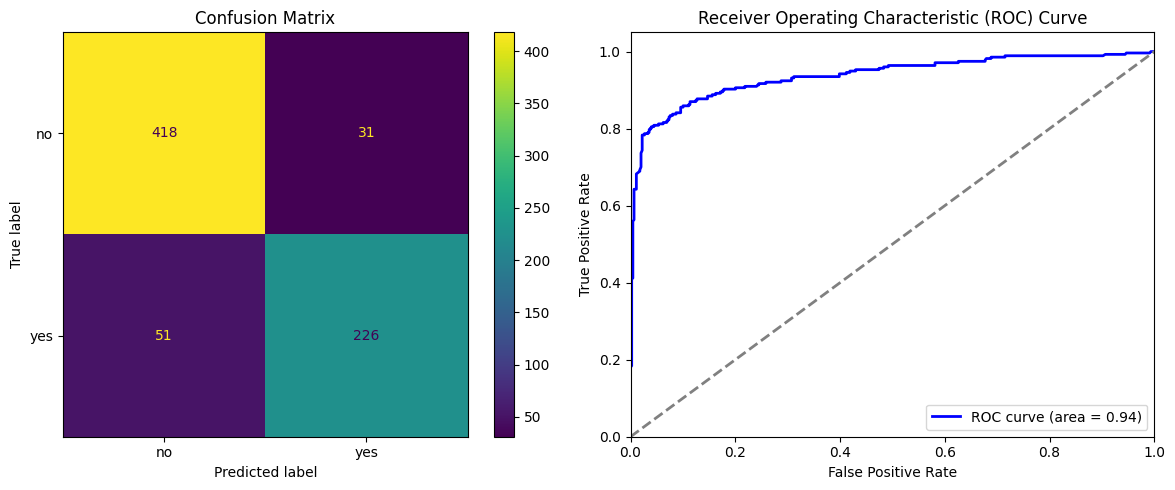

AUC: 0.9366180762705733


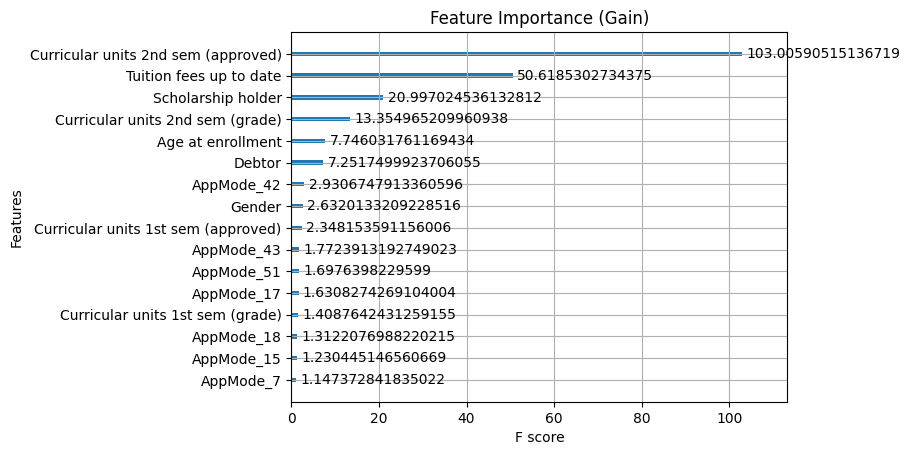

Best parameters found:  {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 200}


In [56]:
train_and_evaluate_xgboost(X_train, X_test, y_train, y_test, param_grid)

#### Neural Network Model

In [63]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Create a sequential model
model = Sequential()

# input layer
model.add(Input(shape=(26,)))
# dense layers
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.1))  # 50% dropout rate
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.1))  # 50% dropout rate
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.1))  # 50% dropout rate
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,153 (12.32 KB)

 Trainable params: 3,153 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5954 - loss: 0.7399 - val_accuracy: 0.7457 - val_loss: 0.5286
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7129 - loss: 0.5741 - val_accuracy: 0.8385 - val_loss: 0.4393
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 0.5009 - val_accuracy: 0.8522 - val_loss: 0.4004
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7897 - loss: 0.4785 - val_accuracy: 0.8694 - val_loss: 0.3796
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8116 - loss: 0.4424 - val_accuracy: 0.8625 - val_loss: 0.3531
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.4231 - val_accuracy: 0.8763 - val_loss: 0.3399
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8433 - loss: 0.4014 - val_accuracy: 0.8866 - val_loss: 0.3312
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3882 - val_accuracy: 0.8832 - val_loss

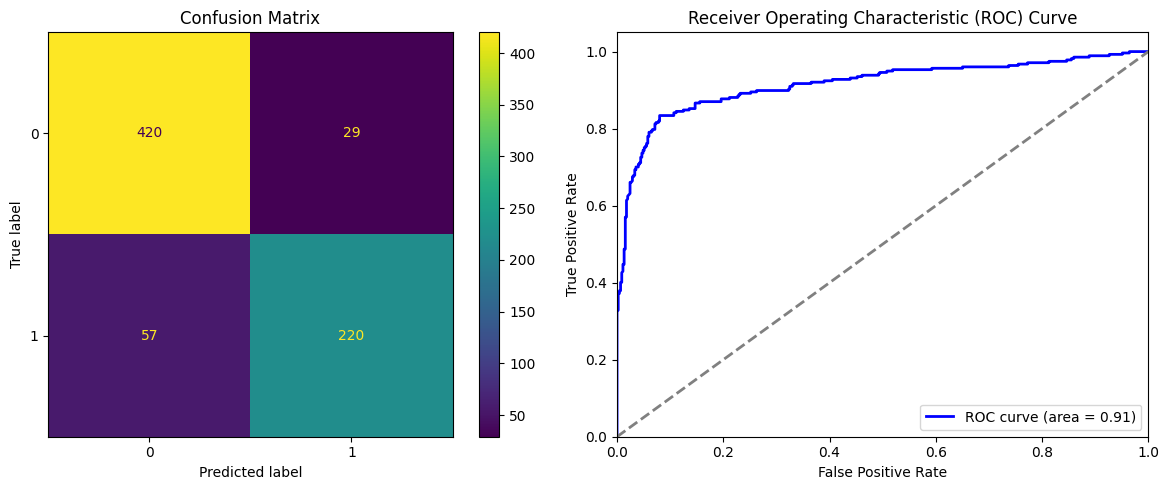

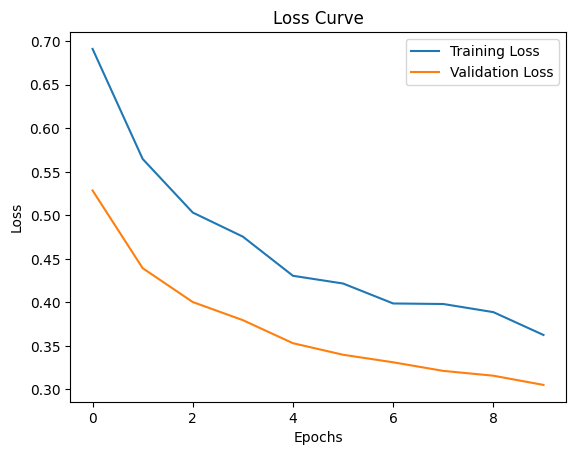

In [76]:
# Compile the model.
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

# Train the model.
# Here, 10% of the training data is held out for validation (using validation_split)
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,  # Use a portion of X_train/y_train as validation
                    callbacks=callbacks)

# Evaluate the model on the test set.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Predict probabilities on the test set.
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary class predictions (using a 0.5 threshold).
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate additional metrics.
classification_rep = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\nClassification Report:")
print(classification_rep)
print(f"AUC: {auc}")

# Compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix and ROC Curve side by side.
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix.
ConfusionMatrixDisplay(cm).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix')

# Plot ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ax[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Plot loss curve (Training and Validation Loss).
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()